In [1]:
import psydac.core.interface as inter
import matplotlib.pyplot as plt

import numpy as np
import sympy as sym

import Bspline as bspline
import derivatives as der
import projectors as proj
import evaluation as eva
import integrate as integr
import core as co

import time

# 1. Dirichlet boundary conditions

In [2]:
bc = False

Lx = 1.
Nel_x = 6
dx = Lx/Nel_x
el_b_x = np.linspace(0, Lx, Nel_x + 1)

px = 3

Nbase_x = Nel_x + px

Tx = inter.make_open_knots(px, Nbase_x)
tx = inter.make_open_knots(px - 1, Nbase_x - 1)

Bx = bspline.Bspline(Tx, px)
Dx = bspline.Bspline(tx, px - 1)

greville_x = inter.compute_greville(px, Nbase_x, Tx)

## 1. 1 Basis of $V_0$ with first derivative

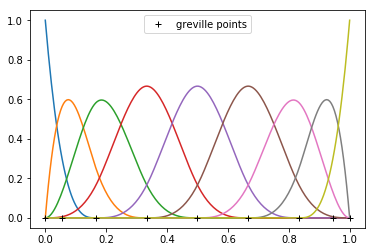

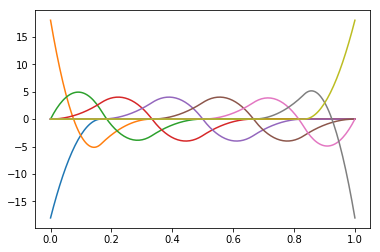

In [3]:
xplot = np.linspace(0, Lx, 200)

for j in range(Nbase_x):
    plt.plot(xplot, Bx(xplot, j))
    
plt.plot(greville_x, np.zeros(len(greville_x)), 'k+', label='greville points')
plt.legend()

plt.figure()
for j in range(Nbase_x):
    plt.plot(xplot, Bx(xplot, j, 1))

In [4]:
co.find_span(Tx, px, 0.4)

5

In [5]:
co.basis_funs(Tx, px, 0.4, 5)

array([0.036     , 0.53866667, 0.41466667, 0.01066667])

In [6]:
co.basis_funs_many(Tx, px, np.array([0.4]), 5)

array([[0.036     ],
       [0.53866667],
       [0.41466667],
       [0.01066667]])

In [8]:
xs = np.random.rand(np.int(1e6))*dx + el_b_x[2]

In [9]:
t0 = time.time()
co.basis_funs_many(Tx, px, xs, 5)
t1 = time.time()
print(t1-t0)

0.15249180793762207


In [22]:
t0 = time.time()
co.basis_funs_many_fast_parallel(Tx, px, xs, 5)
t1 = time.time()
print(t1-t0)

0.11165738105773926


In [12]:
from multiprocessing import Pool

In [19]:
q = Pool(2)
x_split = np.split(xs, 2)

In [20]:
def kernel(x):
    return co.basis_funs_many_fast(Tx, px, x, 5)

In [21]:
res = q.map(kernel, x_split)

In [11]:
test1 = np.empty((10000, 10000))

In [12]:
import time

t0 = time.time()
test1[:, 0] = 1.0
t1 = time.time()
print(t1-t0)

0.01353907585144043


## 1. 2 Basis of $V_1$ and reconstruction of derivative of $V_0$

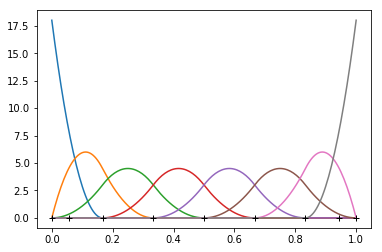

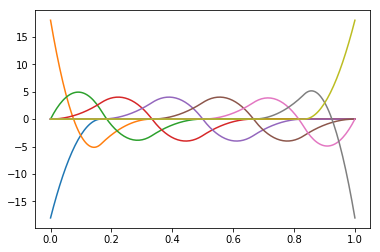

In [4]:
xplot = np.linspace(0, Lx, 200)

for j in range(Nbase_x - 1):
    plt.plot(xplot, px*Dx(xplot, j)/(tx[j + px] - tx[j]))
    
    
plt.plot(greville_x, np.zeros(len(greville_x)), 'k+', label='greville points')
 
plt.figure()
for j in range(Nbase_x):
    
    if j == 0:
        plt.plot(xplot, -px*Dx(xplot, j)/(tx[j + px] - tx[j]))
        
    elif j == Nbase_x - 1:
        plt.plot(xplot, px*Dx(xplot, j - 1)/(tx[j + px - 1] - tx[j - 1]))
        
    else:
        plt.plot(xplot, px*Dx(xplot, j - 1)/(tx[j + px - 1] - tx[j - 1]) - px*Dx(xplot, j)/(tx[j + px] - tx[j]))

## 1. 3 Test projectors $\Pi_0$ and $\Pi_1$

In [5]:
# test projector PI_0
Psi_0 = lambda x : x*np.sin(2*np.pi*x)

vec_0 = proj.PI_0_1d(Psi_0, px, Nbase_x, Tx, bc)

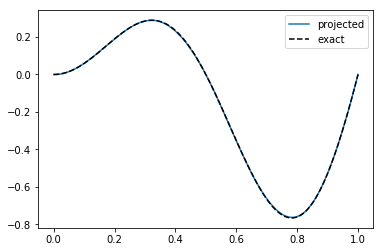

In [6]:
plt.plot(xplot, eva.evaluate_field_V0_1d(vec_0, xplot, px, Nbase_x, Tx, bc), label='projected')
plt.plot(xplot, Psi_0(xplot), 'k--', label='exact')
plt.legend()

In [7]:
# test projector PI_1
Psi_1 = lambda x : x*np.sin(2*np.pi*x)

vec_1 = proj.PI_1_1d(Psi_1, px, Nbase_x, Tx, bc)

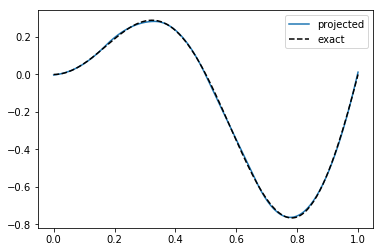

In [8]:
plt.plot(xplot, eva.evaluate_field_V1_1d(vec_1, xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, Psi_1(xplot), 'k--', label = 'exact')
plt.legend()

## 1. 4 Test mass matrices with $L^2$-projection

In [9]:
# test mass matrix M0
Psi_0 = lambda x : x*np.sin(2*np.pi*x)

M0  = integr.mass_matrix_V0_1d(px, Nbase_x, Tx, bc)
rhs = integr.L2_prod_V0_1d(Psi_0, px, Nbase_x, Tx)[1:-1]

res = np.linalg.solve(M0, rhs)

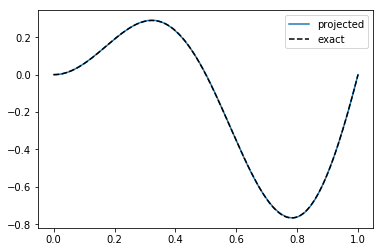

In [10]:
plt.plot(xplot, eva.evaluate_field_V0_1d(res, xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, Psi_0(xplot), 'k--', label = 'exact')
plt.legend()

L2-error = 0.004341264708640537 , degree = 1 , Nel = 16
L2-error = 0.0010605115469176237 , degree = 1 , Nel = 32
L2-error = 0.0002631502108195977 , degree = 1 , Nel = 64
L2-error = 6.561093332292822e-05 , degree = 1 , Nel = 128
L2-error = 1.638508981014272e-05 , degree = 1 , Nel = 256
L2-error = 0.00021233851940364562 , degree = 2 , Nel = 16
L2-error = 2.8252361565376678e-05 , degree = 2 , Nel = 32
L2-error = 4.11658859689616e-06 , degree = 2 , Nel = 64
L2-error = 6.412749474454687e-07 , degree = 2 , Nel = 128
L2-error = 1.050396721021265e-07 , degree = 2 , Nel = 256
L2-error = 1.5413300602687368e-05 , degree = 3 , Nel = 16
L2-error = 9.736305771241415e-07 , degree = 3 , Nel = 32
L2-error = 6.605524139036418e-08 , degree = 3 , Nel = 64
L2-error = 4.7542074116166175e-09 , degree = 3 , Nel = 128
L2-error = 3.6320629423776156e-10 , degree = 3 , Nel = 256


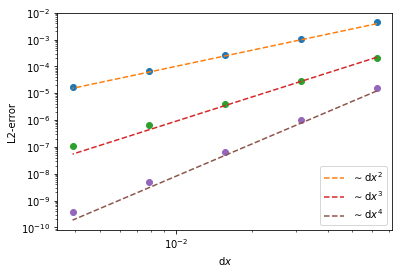

In [11]:
# check convergence
from scipy.integrate import fixed_quad

cases_p = 3
cases_e = 5

L2_error = np.zeros((cases_p, cases_e))
dxs = np.zeros((cases_p, cases_e))

for p in range(1, cases_p + 1):
    for i in range(3, 3 + cases_e):
        Nel = 2*2**i
        el_b = np.linspace(0, Lx, Nel + 1)
        dxs[p - 1, i - 3] = Lx/Nel
        
        Nbase = Nel + p
        T = inter.make_open_knots(p, Nbase) 
        
        m0 = integr.mass_matrix_V0_1d(p, Nbase, T, bc)
        rh = integr.L2_prod_V0_1d(Psi_0, p, Nbase, T)[1:-1]
        re = np.linalg.solve(m0, rh)
        
        # L2-error
        diff = lambda x : (Psi_0(x) - eva.evaluate_field_V0_1d(re, x, p, Nbase, T, bc))**2
        
        for k in range(Nel):
            L2_error[p - 1, i - 3] += fixed_quad(diff, el_b[k], el_b[k + 1])[0]
            
        L2_error[p - 1, i - 3] = np.sqrt(L2_error[p - 1, i - 3]) 
        print('L2-error =', L2_error[p - 1, i - 3], ', degree =' , p, ', Nel =', Nel)

        
abzisse = np.array([1, 0.9, 0.8]) 
labels = ['$\sim \mathrm{d}x^2$', '$\sim \mathrm{d}x^3$', '$\sim  \mathrm{d}x^4$']
        
for p in range(cases_p):
    plt.loglog(dxs[p], L2_error[p], 'o')
    plt.loglog(dxs[p], abzisse[p]*dxs[p]**(p + 2), '--', label = labels[p])

plt.xlabel('$\mathrm{d}x$')
plt.ylabel('L2-error')
plt.legend()

In [12]:
# test mass matrix M1
Psi_0 = lambda x : x*np.sin(2*np.pi*x)

M1  = integr.mass_matrix_V1_1d(px, Nbase_x, Tx, bc)
rhs = integr.L2_prod_V1_1d(Psi_0, px, Nbase_x, Tx)

res = np.linalg.solve(M1, rhs)

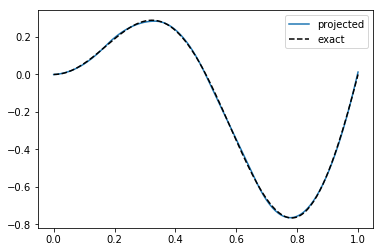

In [13]:
plt.plot(xplot, eva.evaluate_field_V1_1d(res, xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, Psi_0(xplot), 'k--', label = 'exact')
plt.legend()

L2-error = 0.0028461729637857835 , degree = 2 , Nel = 16
L2-error = 0.0007018581064195039 , degree = 2 , Nel = 32
L2-error = 0.00017483334878673671 , degree = 2 , Nel = 64
L2-error = 4.3668035996803726e-05 , degree = 2 , Nel = 128
L2-error = 1.0914462676301578e-05 , degree = 2 , Nel = 256
L2-error = 0.00017613384331642968 , degree = 3 , Nel = 16
L2-error = 2.1532900348307238e-05 , degree = 3 , Nel = 32
L2-error = 2.692763485698761e-06 , degree = 3 , Nel = 64
L2-error = 3.3766213192617555e-07 , degree = 3 , Nel = 128
L2-error = 4.2305782401442e-08 , degree = 3 , Nel = 256
L2-error = 1.4630047609781715e-05 , degree = 4 , Nel = 16
L2-error = 8.755263831657717e-07 , degree = 4 , Nel = 32
L2-error = 5.425451330801368e-08 , degree = 4 , Nel = 64
L2-error = 3.3887798529074517e-09 , degree = 4 , Nel = 128
L2-error = 2.1193232411835854e-10 , degree = 4 , Nel = 256


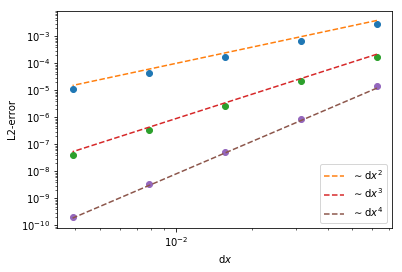

In [14]:
# check convergence
from scipy.integrate import fixed_quad

cases_p = 3
cases_e = 5

L2_error = np.zeros((cases_p, cases_e))
dxs = np.zeros((cases_p, cases_e))

for p in range(2, cases_p + 2):
    for i in range(3, 3 + cases_e):
        Nel = 2*2**i
        el_b = np.linspace(0, Lx, Nel + 1)
        dxs[p - 2, i - 3] = Lx/Nel
        
        Nbase = Nel + p
        T = inter.make_open_knots(p, Nbase) 
        
        m1 = integr.mass_matrix_V1_1d(p, Nbase, T, bc)
        rh = integr.L2_prod_V1_1d(Psi_0, p, Nbase, T)
        re = np.linalg.solve(m1, rh)
        
        # L2-error
        diff = lambda x : (Psi_0(x) - eva.evaluate_field_V1_1d(re, x, p, Nbase, T, bc))**2
        
        for k in range(Nel):
            L2_error[p - 2, i - 3] += fixed_quad(diff, el_b[k], el_b[k + 1])[0]
            
        L2_error[p - 2, i - 3] = np.sqrt(L2_error[p - 2, i - 3]) 
        print('L2-error =', L2_error[p - 2, i - 3], ', degree =' , p, ', Nel =', Nel)

        
abzisse = np.array([1, 0.9, 0.8])
labels = ['$\sim \mathrm{d}x^2$', '$\sim \mathrm{d}x^3$', '$\sim  \mathrm{d}x^4$']
        
for p in range(cases_p):
    plt.loglog(dxs[p], L2_error[p], 'o')
    plt.loglog(dxs[p], abzisse[p]*dxs[p]**(p + 2),'--', label = labels[p])

plt.xlabel('$\mathrm{d}x$')
plt.ylabel('L2-error')
plt.legend()

## 1. 5 Poisson equation

In [15]:
x = sym.symbols('x')
u = x*sym.sin(2*sym.pi*x)

f = -sym.diff(u, x, x)
f = sym.lambdify(x, f)
u = sym.lambdify(x, u)

In [16]:
G  = der.GRAD_1d(px, Nbase_x, bc)
M0 = integr.mass_matrix_V0_1d(px, Nbase_x, Tx, bc)
M1 = integr.mass_matrix_V1_1d(px, Nbase_x, Tx, bc)
rhs = integr.L2_prod_V0_1d(f, px, Nbase_x, Tx)[1:-1]

In [17]:
temp0 = np.zeros((np.dot(np.transpose(G), M1).shape[0], np.dot(M1, G).shape[1]))
Block = np.block([[M1, np.dot(M1, G)], [-np.dot(np.transpose(G), M1), temp0]])

RHS = np.append(np.zeros(M1.shape[0]), rhs)

res = np.linalg.solve(Block, RHS)

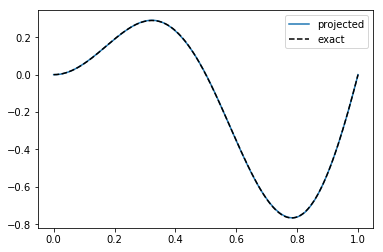

In [18]:
plt.plot(xplot, eva.evaluate_field_V0_1d(res[M1.shape[0]:], xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, u(xplot), 'k--', label = 'exact')
plt.legend()

L2-error = 0.00018877637504714645 , degree = 2 , Nel = 16
L2-error = 2.2192601070687926e-05 , degree = 2 , Nel = 32
L2-error = 2.7299379875496754e-06 , degree = 2 , Nel = 64
L2-error = 3.3985980907238026e-07 , degree = 2 , Nel = 128
L2-error = 4.243923003402424e-08 , degree = 2 , Nel = 256
L2-error = 1.46568925988176e-05 , degree = 3 , Nel = 16
L2-error = 8.759257294610328e-07 , degree = 3 , Nel = 32
L2-error = 5.426392178107307e-08 , degree = 3 , Nel = 64
L2-error = 3.389064363188348e-09 , degree = 3 , Nel = 128
L2-error = 2.119414075257545e-10 , degree = 3 , Nel = 256
L2-error = 9.855147883719038e-07 , degree = 4 , Nel = 16
L2-error = 2.826008907576007e-08 , degree = 4 , Nel = 32
L2-error = 8.635314426614118e-10 , degree = 4 , Nel = 64
L2-error = 2.6846311397964218e-11 , degree = 4 , Nel = 128
L2-error = 8.392344539651207e-13 , degree = 4 , Nel = 256


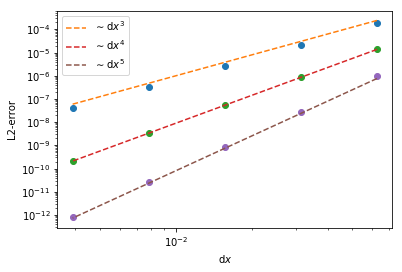

In [19]:
# check convergence
from scipy.integrate import fixed_quad

cases_p = 3
cases_e = 5

L2_error = np.zeros((cases_p, cases_e))
dxs = np.zeros((cases_p, cases_e))

for p in range(2, cases_p + 2):
    for i in range(3, 3 + cases_e):
        Nel = 2*2**i
        el_b = np.linspace(0, Lx, Nel + 1)
        dxs[p - 2, i - 3] = Lx/Nel
        
        Nbase = Nel + p
        T = inter.make_open_knots(p, Nbase) 
        
        G  = der.GRAD_1d(p, Nbase, bc)
        m0 = integr.mass_matrix_V0_1d(p, Nbase, T, bc)
        m1 = integr.mass_matrix_V1_1d(p, Nbase, T, bc)
        rh = integr.L2_prod_V0_1d(f, p, Nbase, T)[1:-1]
        
        temp0 = np.zeros((np.dot(np.transpose(G), m1).shape[0], np.dot(m1, G).shape[1]))
        Block = np.block([[m1, np.dot(m1, G)], [-np.dot(np.transpose(G), m1), temp0]])

        RHS = np.append(np.zeros(m1.shape[0]), rh)

        re = np.linalg.solve(Block, RHS)
        
        # L2-error
        diff = lambda x : (u(x) - eva.evaluate_field_V0_1d(re[m1.shape[0]:], x, p, Nbase, T, bc))**2
        
        for k in range(Nel):
            L2_error[p - 2, i - 3] += fixed_quad(diff, el_b[k], el_b[k + 1])[0]
            
        L2_error[p - 2, i - 3] = np.sqrt(L2_error[p - 2, i - 3]) 
        print('L2-error =', L2_error[p - 2, i - 3], ', degree =' , p, ', Nel =', Nel)

        
abzisse = np.array([1, 0.9, 0.8])
labels = ['$\sim \mathrm{d}x^3$', '$\sim \mathrm{d}x^4$', '$\sim  \mathrm{d}x^5$']
        
for p in range(cases_p):
    plt.loglog(dxs[p], L2_error[p], 'o')
    plt.loglog(dxs[p], abzisse[p]*dxs[p]**(p + 3),'--', label = labels[p])

plt.xlabel('$\mathrm{d}x$')
plt.ylabel('L2-error')
plt.legend()

# 2. Periodic boundary conditions

In [2]:
import psydac.core.bsplines as bsp

bc = True

Lx = np.pi
Nel_x = 6
dx = Lx/Nel_x
el_b_x = np.linspace(0, Lx, Nel_x + 1)

px = 3

Nbase_x = Nel_x + px

Tx = inter.make_periodic_knots(px, Nbase_x)*Lx
tx = inter.make_periodic_knots(px - 1, Nbase_x - 1)*Lx

Bx = bspline.Bspline(Tx, px)
Dx = bspline.Bspline(tx, px - 1)

greville_x = (inter.compute_greville(px, Nbase_x, Tx))%Lx

## 1. 1 Basis of $V_0$ with first derivative

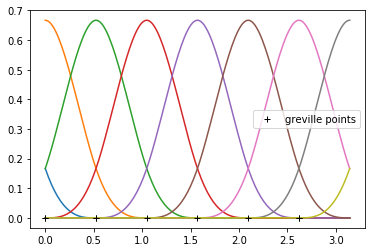

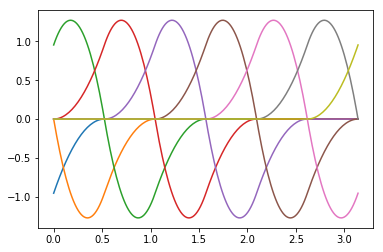

In [3]:
xplot = np.linspace(0, Lx, 200)

for j in range(Nbase_x):
    plt.plot(xplot, Bx(xplot, j))
    
plt.plot(greville_x, np.zeros(len(greville_x)), 'k+', label='greville points')
plt.legend()

plt.figure()
for j in range(Nbase_x):
    plt.plot(xplot, Bx(xplot, j, 1))

## 1. 2 Basis of $V_1$ and reconstruction of derivative of $V_0$

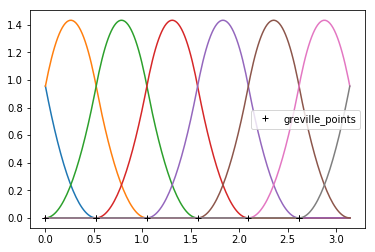

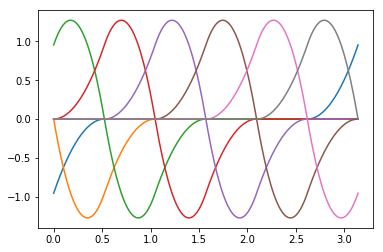

In [4]:
xplot = np.linspace(0, Lx, 200)


for j in range(Nbase_x - 1):
    plt.plot(xplot, px*Dx(xplot, j)/(tx[j + px] - tx[j]))

plt.plot(greville_x, np.zeros(len(greville_x)), 'k+', label='greville_points')
plt.legend()
    
    
plt.figure()
for j in range(Nbase_x - 1):
    plt.plot(xplot, (px*Dx(xplot, j - 1)/(tx[j + px] - tx[j]) - px*Dx(xplot, j)/(tx[j + px] - tx[j])))

In [5]:
pts_loc, wts_loc = np.polynomial.legendre.leggauss(px + 1)

pts = np.zeros((px + 1, Nel_x))
wts = np.zeros((px + 1, Nel_x))

for i in range(px + 1):
    for j in range(Nel_x):
        wts[i, j] = wts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2
        pts[i, j] = pts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2 + (el_b_x[j + 1] + el_b_x[j])/2


d = 0
Nbase_0 = Nbase_x - px

mass0 = np.zeros((Nbase_0, Nbase_0))

for ie in range(Nel_x):
    for il in range(px + 1):
        for jl in range(px + 1):
            i = ie + il
            j = ie + jl

            value = 0.

            for g in range(px + 1):
                value += wts[g, ie]*Bx(pts[g, ie], i)*Bx(pts[g, ie], j)

            mass0[i%Nbase_0, j%Nbase_0] += value

In [6]:
pts_loc, wts_loc = np.polynomial.legendre.leggauss(px)

pts = np.zeros((px, Nel_x))
wts = np.zeros((px, Nel_x))

for i in range(px):
    for j in range(Nel_x):
        wts[i, j] = wts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2
        pts[i, j] = pts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2 + (el_b_x[j + 1] + el_b_x[j])/2


d = 1
Nbase_0 = Nbase_x - px

mass1 = np.zeros((Nbase_0, Nbase_0))

for ie in range(Nel_x):
    for il in range(px):
        for jl in range(px):
            i = ie + il
            j = ie + jl

            value = 0.

            for g in range(px):
                value += wts[g, ie]*Dx(pts[g, ie], i)*Dx(pts[g, ie], j)*px/(tx[i + px] - tx[i])*px/(tx[j + px] - tx[j])

            mass1[i%Nbase_0, j%Nbase_0] += value

In [7]:
np.allclose(mass0, integr.mass_matrix_V0_1d(px, Nbase_x, Tx/Lx, bc)*Lx)

True

In [8]:
np.allclose(mass1, integr.mass_matrix_V1_1d(px, Nbase_x, Tx/Lx, bc)/Lx)

True

In [9]:
pts_loc, wts_loc = np.polynomial.legendre.leggauss(px)

pts = np.zeros((px, Nel_x))
wts = np.zeros((px, Nel_x))

for i in range(px ):
    for j in range(Nel_x):
        wts[i, j] = wts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2
        pts[i, j] = pts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2 + (el_b_x[j + 1] + el_b_x[j])/2


d = 1
Nbase_0 = Nbase_x - px

norm_0 = np.zeros(Nbase_0)

for ie in range(Nel_x):
    for il in range(px + 1):
        i = ie + il

        value = 0.

        for g in range(px):
            value += wts[g, ie]*Bx(pts[g, ie], i)

        norm_0[i%Nbase_0] += value

In [10]:
pts_loc, wts_loc = np.polynomial.legendre.leggauss(px - 1)

pts = np.zeros((px - 1, Nel_x))
wts = np.zeros((px - 1, Nel_x))

for i in range(px - 1):
    for j in range(Nel_x):
        wts[i, j] = wts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2
        pts[i, j] = pts_loc[i]*(el_b_x[j + 1] - el_b_x[j])/2 + (el_b_x[j + 1] + el_b_x[j])/2


d = 1
Nbase_0 = Nbase_x - px

norm_1 = np.zeros(Nbase_0)

for ie in range(Nel_x):
    for il in range(px):
        i = ie + il

        value = 0.

        for g in range(px - 1):
            value += wts[g, ie]*Dx(pts[g, ie], i)*px/(tx[i + px] - tx[i])

        norm_1[i%Nbase_0] += value

In [19]:
norm_00 = integr.normalization_V0_1d(px, Nbase_x, Tx/Lx)*Lx

norm_00[:px] += norm_00[-px:]
norm_00 = norm_00[:norm_00.size - px]

In [20]:
np.allclose(norm_0, norm_00)

True

In [21]:
norm_11 = integr.normalization_V1_1d(px, Nbase_x, Tx/Lx)

norm_11[:(px - 1)] += norm_11[-(px - 1):]
norm_11 = norm_11[:norm_11.size - (px - 1)]

In [22]:
np.allclose(norm_1, norm_11)

True

## 1. 3 Test projectors $\Pi_0$ and $\Pi_1$

In [45]:
# test projector PI_0
shift = 0.5
Psi_0 = lambda x : 1/(0.5*np.cos(2*np.pi*x) + 1)*np.sin(2*np.pi*x) + shift

vec_0 = proj.PI_0_1d(Psi_0, px, Nbase_x, Tx, bc)

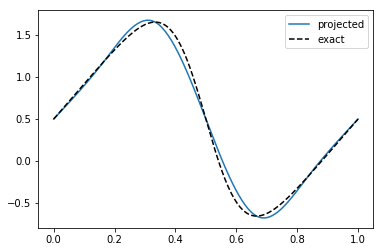

In [46]:
plt.plot(xplot, eva.evaluate_field_V0_1d(vec_0, xplot, px, Nbase_x, Tx, bc), label='projected')
plt.plot(xplot, Psi_0(xplot), 'k--', label='exact')
plt.legend()

In [47]:
# test projector PI_1
shift = 0.5
Psi_1 = lambda x : 1/(0.5*np.cos(2*np.pi*x) + 1)*np.sin(2*np.pi*x) + shift

vec_1 = proj.PI_1_1d(Psi_0, px, Nbase_x, Tx, bc)

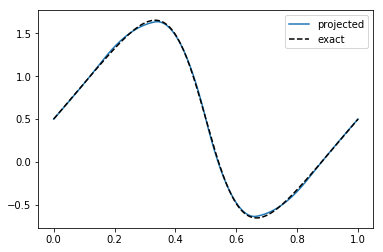

In [48]:
plt.plot(xplot, eva.evaluate_field_V1_1d(vec_1, xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, Psi_1(xplot), 'k--', label = 'exact')
plt.legend()

## 1. 4 Test mass matrices with $L^2$-projection

In [49]:
# test mass matrix M0
shift = 0.5
Psi_0 = lambda x : 1/(0.5*np.cos(2*np.pi*x) + 1)*np.sin(2*np.pi*x) + shift

M0  = integr.mass_matrix_V0_1d(px, Nbase_x, Tx, bc)

rhs = integr.L2_prod_V0_1d(Psi_0, px, Nbase_x, Tx)
rhs[:px] += rhs[-px:]
rhs = rhs[:rhs.size - px]

res = np.linalg.solve(M0, rhs)

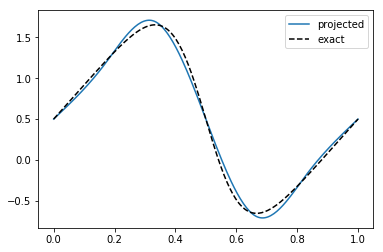

In [50]:
plt.plot(xplot, eva.evaluate_field_V0_1d(res, xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, Psi_0(xplot), 'k--', label = 'exact')
plt.legend()

L2-error = 0.011454178099905036 , degree = 1 , Nel = 16
L2-error = 0.0027194023986771075 , degree = 1 , Nel = 32
L2-error = 0.0006713341395038949 , degree = 1 , Nel = 64
L2-error = 0.00016730950455095777 , degree = 1 , Nel = 128
L2-error = 4.179475295397927e-05 , degree = 1 , Nel = 256
L2-error = 0.0012373189005378806 , degree = 2 , Nel = 16
L2-error = 0.0001210546412215064 , degree = 2 , Nel = 32
L2-error = 1.4213938470382461e-05 , degree = 2 , Nel = 64
L2-error = 1.749029115029747e-06 , degree = 2 , Nel = 128
L2-error = 2.177697023311909e-07 , degree = 2 , Nel = 256
L2-error = 0.0003655251173620781 , degree = 3 , Nel = 16
L2-error = 1.2209265541835593e-05 , degree = 3 , Nel = 32
L2-error = 6.495300973711586e-07 , degree = 3 , Nel = 64
L2-error = 3.892885767298474e-08 , degree = 3 , Nel = 128
L2-error = 2.407368363607277e-09 , degree = 3 , Nel = 256


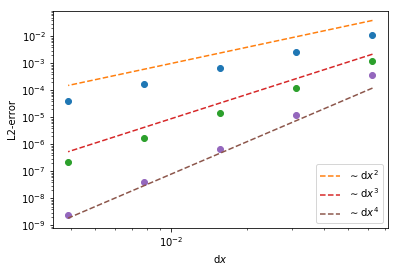

In [51]:
# check convergence
from scipy.integrate import fixed_quad

cases_p = 3
cases_e = 5

L2_error = np.zeros((cases_p, cases_e))
dxs = np.zeros((cases_p, cases_e))

for p in range(1, cases_p + 1):
    for i in range(3, 3 + cases_e):
        Nel = 2*2**i
        el_b = np.linspace(0, Lx, Nel + 1)
        dxs[p - 1, i - 3] = Lx/Nel
        
        Nbase = Nel + p
        T = inter.make_periodic_knots(p, Nbase) 
        
        m0 = integr.mass_matrix_V0_1d(p, Nbase, T, bc)
        
        rh = integr.L2_prod_V0_1d(Psi_0, p, Nbase , T)
        rh[:p] += rh[-p:]
        rh = rh[:rh.size - p]
        
        re = np.linalg.solve(m0, rh)
        
        # L2-error
        diff = lambda x : (Psi_0(x) - eva.evaluate_field_V0_1d(re, x, p, Nbase, T, bc))**2
        
        for k in range(Nel):
            L2_error[p - 1, i - 3] += fixed_quad(diff, el_b[k], el_b[k + 1])[0]
            
        L2_error[p - 1, i - 3] = np.sqrt(L2_error[p - 1, i - 3]) 
        print('L2-error =', L2_error[p - 1, i - 3], ', degree =' , p, ', Nel =', Nel)

        
abzisse = np.array([10, 9, 8]) 
labels = ['$\sim \mathrm{d}x^2$', '$\sim \mathrm{d}x^3$', '$\sim  \mathrm{d}x^4$']
        
for p in range(cases_p):
    plt.loglog(dxs[p], L2_error[p], 'o')
    plt.loglog(dxs[p], abzisse[p]*dxs[p]**(p + 2), '--', label = labels[p])

plt.xlabel('$\mathrm{d}x$')
plt.ylabel('L2-error')
plt.legend()

In [52]:
# test mass matrix M1
shift = 0.5
Psi_1 = lambda x : 1/(0.5*np.cos(2*np.pi*x) + 1)*np.sin(2*np.pi*x) + shift

M1  = integr.mass_matrix_V1_1d(px, Nbase_x, Tx, bc)

rhs = integr.L2_prod_V1_1d(Psi_1, px, Nbase_x, Tx)
rhs[:(px - 1)] += rhs[-(px - 1):]
rhs = rhs[:rhs.size - (px - 1)]

res = np.linalg.solve(M1, rhs)

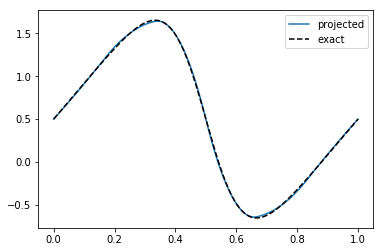

In [53]:
plt.plot(xplot, eva.evaluate_field_V1_1d(res, xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, Psi_0(xplot), 'k--', label = 'exact')
plt.legend()

L2-error = 0.007723004060700014 , degree = 2 , Nel = 16
L2-error = 0.0018181174580059196 , degree = 2 , Nel = 32
L2-error = 0.0004478770437343503 , degree = 2 , Nel = 64
L2-error = 0.00011155968348775013 , degree = 2 , Nel = 128
L2-error = 2.7864418787377277e-05 , degree = 2 , Nel = 256
L2-error = 0.0012278357619960416 , degree = 3 , Nel = 16
L2-error = 0.00012079500927516316 , degree = 3 , Nel = 32
L2-error = 1.4205988822763029e-05 , degree = 3 , Nel = 64
L2-error = 1.7487818056842864e-06 , degree = 3 , Nel = 128
L2-error = 2.177619823304211e-07 , degree = 3 , Nel = 256
L2-error = 0.0003655115938960261 , degree = 4 , Nel = 16
L2-error = 1.2209209930670203e-05 , degree = 4 , Nel = 32
L2-error = 6.495298867774557e-07 , degree = 4 , Nel = 64
L2-error = 3.8928856850046735e-08 , degree = 4 , Nel = 128
L2-error = 2.4073683638526457e-09 , degree = 4 , Nel = 256


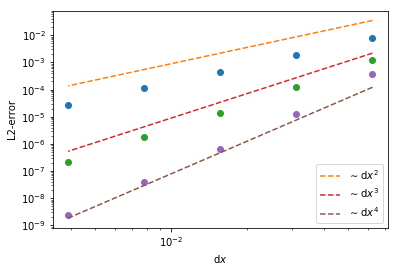

In [54]:
# check convergence
from scipy.integrate import fixed_quad

cases_p = 3
cases_e = 5

L2_error = np.zeros((cases_p, cases_e))
dxs = np.zeros((cases_p, cases_e))

for p in range(2, cases_p + 2):
    for i in range(3, 3 + cases_e):
        Nel = 2*2**i
        el_b = np.linspace(0, Lx, Nel + 1)
        dxs[p - 2, i - 3] = Lx/Nel
        
        Nbase = Nel + p
        T = inter.make_periodic_knots(p, Nbase) 
        
        m1 = integr.mass_matrix_V1_1d(p, Nbase, T, bc)
        
        rh = integr.L2_prod_V1_1d(Psi_0, p, Nbase, T)
        rh[:(p - 1)] += rh[-(p - 1):]
        rh = rh[:rh.size - (p - 1)]
        
        re = np.linalg.solve(m1, rh)
        
        # L2-error
        diff = lambda x : (Psi_0(x) - eva.evaluate_field_V1_1d(re, x, p, Nbase, T, bc))**2
        
        for k in range(Nel):
            L2_error[p - 2, i - 3] += fixed_quad(diff, el_b[k], el_b[k + 1])[0]
            
        L2_error[p - 2, i - 3] = np.sqrt(L2_error[p - 2, i - 3]) 
        print('L2-error =', L2_error[p - 2, i - 3], ', degree =' , p, ', Nel =', Nel)

        
abzisse = np.array([9, 9, 8])
labels = ['$\sim \mathrm{d}x^2$', '$\sim \mathrm{d}x^3$', '$\sim  \mathrm{d}x^4$']
        
for p in range(cases_p):
    plt.loglog(dxs[p], L2_error[p], 'o')
    plt.loglog(dxs[p], abzisse[p]*dxs[p]**(p + 2),'--', label = labels[p])

plt.xlabel('$\mathrm{d}x$')
plt.ylabel('L2-error')
plt.legend()

## 1. 5 Poisson equation

In [55]:
shift = 0.5
x = sym.symbols('x')
u = 1/(0.5*sym.cos(x*2*sym.pi) + 1)*sym.sin(x*2*sym.pi) + shift

f = -sym.diff(u, x, x)
f = sym.lambdify(x, f)
u = sym.lambdify(x, u)

In [56]:
G  = der.GRAD_1d(px, Nbase_x, bc)
M0 = integr.mass_matrix_V0_1d(px, Nbase_x, Tx, bc)
M1 = integr.mass_matrix_V1_1d(px, Nbase_x, Tx, bc)

rhs = integr.L2_prod_V0_1d(f, px, Nbase_x, Tx)
rhs[:px] += rhs[-px:]
rhs = rhs[:rhs.size - px]

In [57]:
mat = -np.dot(np.transpose(G), M1)
mat[-1] = 0.

temp0 = np.zeros((np.dot(np.transpose(G), M1).shape[0], np.dot(M1, G).shape[1]))
temp0[-1] = 1.

Block = np.block([[M1, np.dot(M1, G)], [mat, temp0]])

pts_x_loc, wts_x_loc = np.polynomial.legendre.leggauss(px)
pts_x, wts_x = inter.construct_quadrature_grid(Nel_x, px, pts_x_loc, wts_x_loc, el_b_x)
basis_x = inter.eval_on_grid_splines_ders(px, Nbase_x, px, 0, Tx, pts_x)

norm = 0.

for ie in range(px + 1):
    
    il_x = px - ie
    value = 0.
    for g_x in range(px):
        value += wts_x[g_x, ie]*basis_x[il_x, 0, g_x, ie]
        
    norm += value


RHS = np.append(np.zeros(M1.shape[0]), rhs)
RHS[-1] = shift/norm

res = np.linalg.solve(Block, RHS)

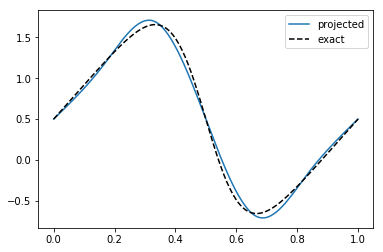

In [58]:
plt.plot(xplot, eva.evaluate_field_V0_1d(res[M1.shape[0]:], xplot, px, Nbase_x, Tx, bc), label = 'projected')
plt.plot(xplot, u(xplot), 'k--', label = 'exact')
plt.legend()

L2-error = 0.001322252858318393 , degree = 2 , Nel = 16
L2-error = 0.00012327471398753642 , degree = 2 , Nel = 32
L2-error = 1.4278663124321233e-05 , degree = 2 , Nel = 64
L2-error = 1.7510163841815138e-06 , degree = 2 , Nel = 128
L2-error = 2.178315304837135e-07 , degree = 2 , Nel = 256
L2-error = 0.0003696204609859542 , degree = 3 , Nel = 16
L2-error = 1.2215416325600834e-05 , degree = 3 , Nel = 32
L2-error = 6.495445050029732e-07 , degree = 3 , Nel = 64
L2-error = 3.892890707253791e-08 , degree = 3 , Nel = 128
L2-error = 2.4073685514313203e-09 , degree = 3 , Nel = 256
L2-error = 0.00014081860117829068 , degree = 4 , Nel = 16
L2-error = 1.731410692867559e-06 , degree = 4 , Nel = 32
L2-error = 3.8938170802200654e-08 , degree = 4 , Nel = 64
L2-error = 1.1105571079290438e-09 , degree = 4 , Nel = 128
L2-error = 3.389168994369901e-11 , degree = 4 , Nel = 256


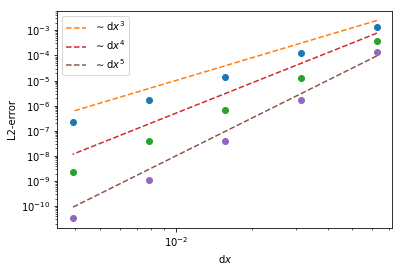

In [59]:
# check convergence
from scipy.integrate import fixed_quad

cases_p = 3
cases_e = 5

L2_error = np.zeros((cases_p, cases_e))
dxs = np.zeros((cases_p, cases_e))

for p in range(2, cases_p + 2):
    for i in range(3, 3 + cases_e):
        Nel = 2*2**i
        el_b = np.linspace(0, Lx, Nel + 1)
        dxs[p - 2, i - 3] = Lx/Nel
        
        Nbase = Nel + p
        T = inter.make_periodic_knots(p, Nbase) 
        
        G  = der.GRAD_1d(p, Nbase, bc)
        m0 = integr.mass_matrix_V0_1d(p, Nbase, T, bc)
        m1 = integr.mass_matrix_V1_1d(p, Nbase, T, bc)
        
        rh = integr.L2_prod_V0_1d(f, p, Nbase, T)
        rh[:p] += rh[-p:]
        rh = rh[:rh.size - p]
        
        mat = -np.dot(np.transpose(G), m1)
        mat[-1] = 0.
        
        temp0 = np.zeros((np.dot(np.transpose(G), m1).shape[0], np.dot(m1, G).shape[1]))
        temp0[-1] = 1.

        Block = np.block([[m1, np.dot(m1, G)], [mat, temp0]])

        pts_loc, wts_loc = np.polynomial.legendre.leggauss(p)
        pts, wts = inter.construct_quadrature_grid(Nel, p, pts_loc, wts_loc, el_b)
        basis = inter.eval_on_grid_splines_ders(p, Nbase, p, 0, T, pts)

        norm = 0.

        for ie in range(p + 1):

            il = p - ie
            value = 0.
            for g in range(p):
                value += wts[g, ie]*basis[il, 0, g, ie]

            norm += value
        

        RHS = np.append(np.zeros(m1.shape[0]), rh)
        RHS[-1] = shift/norm

        re = np.linalg.solve(Block, RHS)
        
        # L2-error
        diff = lambda x : (u(x) - eva.evaluate_field_V0_1d(re[m1.shape[0]:], x, p, Nbase, T, bc))**2
        
        for k in range(Nel):
            L2_error[p - 2, i - 3] += fixed_quad(diff, el_b[k], el_b[k + 1])[0]
            
        L2_error[p - 2, i - 3] = np.sqrt(L2_error[p - 2, i - 3]) 
        print('L2-error =', L2_error[p - 2, i - 3], ', degree =' , p, ', Nel =', Nel)

        
abzisse = np.array([10, 50, 100])
labels = ['$\sim \mathrm{d}x^3$', '$\sim \mathrm{d}x^4$', '$\sim  \mathrm{d}x^5$']
        
for p in range(cases_p):
    plt.loglog(dxs[p], L2_error[p], 'o')
    plt.loglog(dxs[p], abzisse[p]*dxs[p]**(p + 3),'--', label = labels[p])

plt.xlabel('$\mathrm{d}x$')
plt.ylabel('L2-error')
plt.legend()